# Закрепление знаний. Data-Science-задача с Kaggle

### Представлены данные по оттоку клиентов некоторого банка:

In [264]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Задача: Выяснить основные причины оттока клиентов.

Для этого нам необходимо установить, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов. И на основе этой информации выдать решение, которое поможет разработать кампанию лояльности по удержанию клиентов.

### Для удобства анализа и решения задачи, мы разобьем её на 10 заданий:

1. Каково соотношение ушедших и лояльных клиентов? 

2. Построим график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов.

3. Посмотрим на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? 

4. Посмотрим на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

5. Построим график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавим расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? 

6. Кто чаще уходит, мужчины или женщины? Построим график, который иллюстрирует это.

7. Как отток клиентов зависит от числа приобретённых у банка услуг? 

8. Как влияет наличие статуса активного клиента на отток клиентов? 

9. В какой стране доля ушедших клиентов больше? 

10. Узнаем зависимость оттока клиентов от их кредитного рейтинга.


* импортируем необходимые библиотеки

In [265]:
import pandas as pd

In [266]:
import plotly

In [267]:
import plotly.express as px

* создаем копию нашего датафрейма, чтобы любые изменения не коснулись оригинала

In [268]:
churn_df = churn_data.copy()


* Удаляем столбец "RowNumber", так как он не обладает необходимой нам информацией

In [269]:
churn_df.drop(["RowNumber"], axis=1, inplace=True)

* Получаем таблицу с которой будем работать

In [270]:
churn_df.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [271]:
# Импортируем необходимые библиотеки
import matplotlib.pyplot as plt
%matplotlib inline

In [272]:
plt.style.use('default')

In [273]:
# Меняем значения в столбце "Exited" для читабельности
churn_df['Exited'] = churn_df['Exited'].apply(lambda x: "Ушедший клиент" if x == 1 else "Лояльный клиент")
        

### Задача №1
Найдем соотношение ушедших и лояльных клиентов. Построим круговую диаграмму для наглядности соотношения.

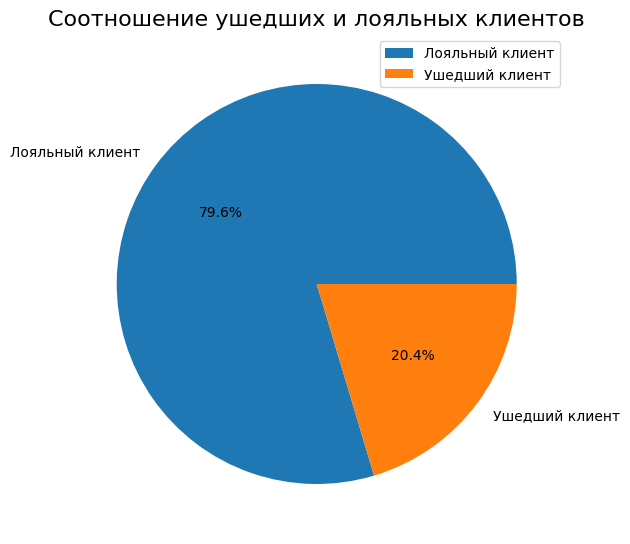

In [274]:
exited_clients = churn_df['Exited'].value_counts() # Выявляем колличество лояльных и ушедших

# Стороим круговую диаграмму
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    exited_clients,
    labels=exited_clients.index,
    autopct='%.1f%%',
    explode = [0, 0]
)
axes.set_title('Соотношение ушедших и лояльных клиентов', fontsize=16)
axes.legend()

Как видно из диаграммы, клиентов, которые остаются лояльными к банку гораздо больше, чем число клиентов, покинувших банк, что говорит нам о том, что существующая модель компании лояльности клиентов является полезной для банка

In [275]:
import seaborn as sns
print(sns.__version__)

0.12.2


### Задача №2
Построим график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов

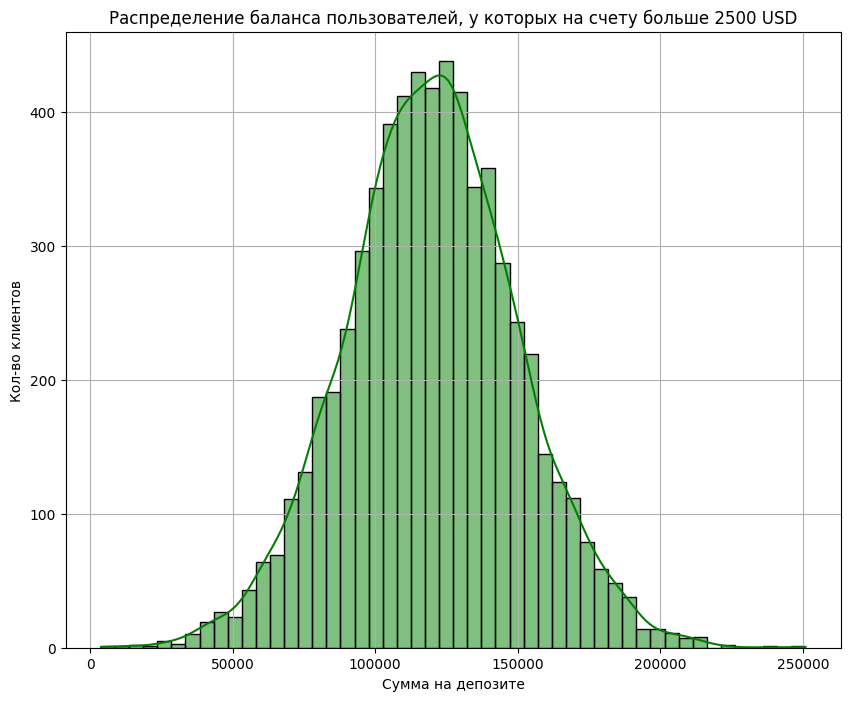

In [276]:
from matplotlib.pyplot import boxplot


balance_over_2500_1 = churn_df[churn_df['Balance'] > 2500] # Используем условие "больше 2500 USD" для столбца "Balance"

# Строим гистограмму для распределение баланса
fig = plt.figure(figsize=(10, 8))
histplot = sns.histplot(
    data=balance_over_2500_1,
    x='Balance',
    bins=50,
    kde=True,
    color='green'
)
histplot.set_title('Распределение баланса пользователей, у которых на счету больше 2500 USD')
histplot.set_xlabel('Сумма на депозите')
histplot.set_ylabel('Кол-во клиентов')
histplot.grid()


Исходя из данного графика, мы можем понять, что большинство клиентов данной категории имеют на своём счету от 120000 до 130000 долларов. Однако само распределение куда обширнее, присутствуют клиенты как с минимальными вкладами, так и с вкладами больше 200000 долларов.

### Задача №3
Посмотрим на распределение баланса клиента в разрезе признака оттока

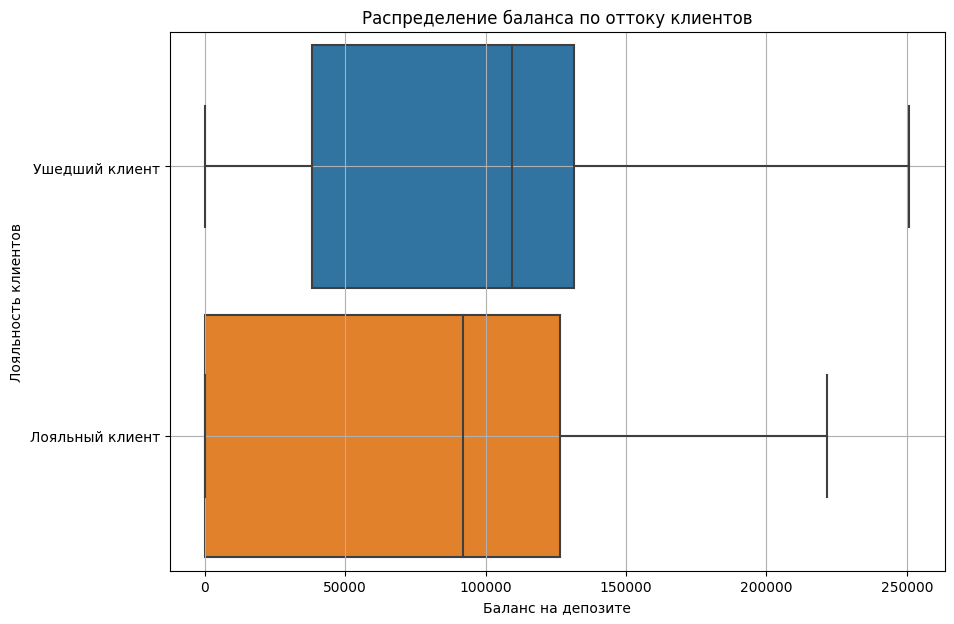

In [277]:

# Строим коробчатую диаграмму для распределение баланса по оттоку клиентов
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=churn_df,
    y='Exited',
    x='Balance',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение баланса по оттоку клиентов')
boxplot.set_xlabel('Баланс на депозите')
boxplot.set_ylabel('Лояльность клиентов')
boxplot.grid()


Исходя из графика, мы можем понять, что клиенты, покинувшие банк имели баланс на депозите больше, чем лояльные банку, однако разница не велика. Также нам видно, что медианое значение баланса выше у ушедших клиентов, чем у оставшихся. Лояльные клиенты имеют большее распределение баланса, от 0 до 130 тыс. долларов, что говорит нам о том, что те, кто имеет баланс больше, уходят чаще, однако опять же, разница не так велика. Могу выдвинуть предположение, что клиенты находят более выгодные условия для больших сумм вкладов в других банках

### Задача №4
Посмотрим на распределение возраста в разрезе признака оттока

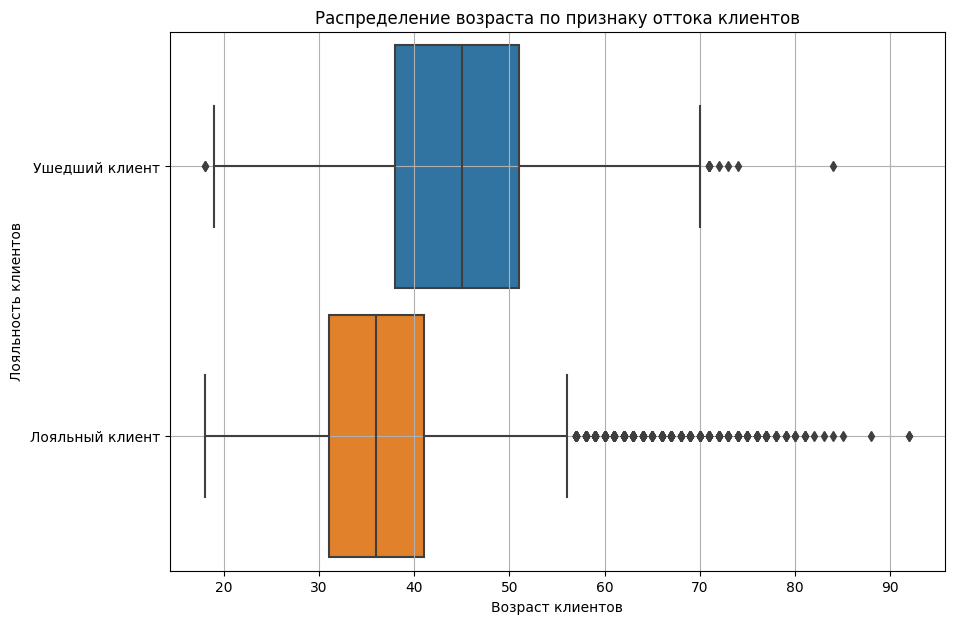

In [278]:
# Строим коробчатую диаграмму для распределение возраста по оттоку клиентов
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=churn_df,
    y='Exited',
    x='Age',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение возраста по признаку оттока клиентов')
boxplot.set_xlabel('Возраст клиентов')
boxplot.set_ylabel('Лояльность клиентов')
boxplot.grid()


In [279]:
display(churn_df.iloc[[6443, 6759, 2458, 3033, 3387]])




,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6443,15764927,Rogova,753,France,Male,92,3,121513.31,1,0,1,195563.99,Лояльный клиент
6759,15660878,T'ien,705,France,Male,92,1,126076.24,2,1,1,34436.83,Лояльный клиент
2458,15813303,Rearick,513,Spain,Male,88,10,0.00,2,1,1,52952.24,Лояльный клиент
3033,15578006,Yao,787,France,Female,85,10,0.00,2,1,1,116537.96,Лояльный клиент
3387,15798024,Lori,537,Germany,Male,84,8,92242.34,1,1,1,186235.98,Лояльный клиент


Из данной диаграммы, мы видим, что большинство ушедших клиентов имеют возраст от 38 до 51. В таком случае, банку стоит подумать над тем, как улучшить условия для своих клиентов от 40 до 50 лет.
Также, мы видим потенциальный выброс среди лояльных клиентов, что говорит нам о том, что есть единицы людей старше 60 лет, которые являются клиентами банка, например Rogova и T'ien являются лояльными клиентами в возрасте 92 лет. (При условии того, что данные в таблице верны и не являются опечаткой)

### Задача №5:
Построим график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты

Text(0.5, 1.0, 'Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты')

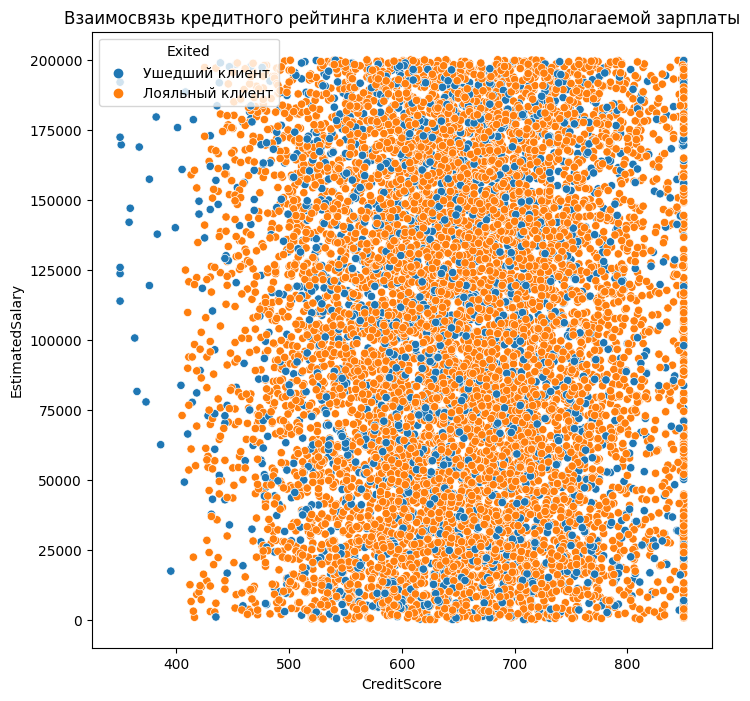

In [280]:
churn_df['CreditScore']
churn_df['EstimatedSalary']

# Строим диаграмму рассения для понимания взаимосвязи кредитного рейтинга и предполагаемой зарплаты клиента
fig = plt.figure(figsize=(8, 8))
scatterplot = sns.scatterplot(
    data=churn_df,
    x='CreditScore',
    y='EstimatedSalary',
    hue='Exited',
  )

scatterplot.set_title('Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты')


Судя по этой диаграмме, взаимосвязи кредитного рейтинга и предполагаемой зарплаты нет. Однако, мы можем увидеть, что минимальный кредитный рейтинг лояльных клиентов больше, чем у ушедших, что говорит нам о том, что клиенты лояльные данному банку берут кредиты и вовремя их оплачивают (кредитный рейтинг больше 400). Но это не значит, что ушедшие клиенты не выплачивают ккредиты вовремя, возможно они берут меньше кредитов, что и сказывается на низком кредитном рейтинге

### Задача №6:
Кто чаще уходит, мужчины или женщины?

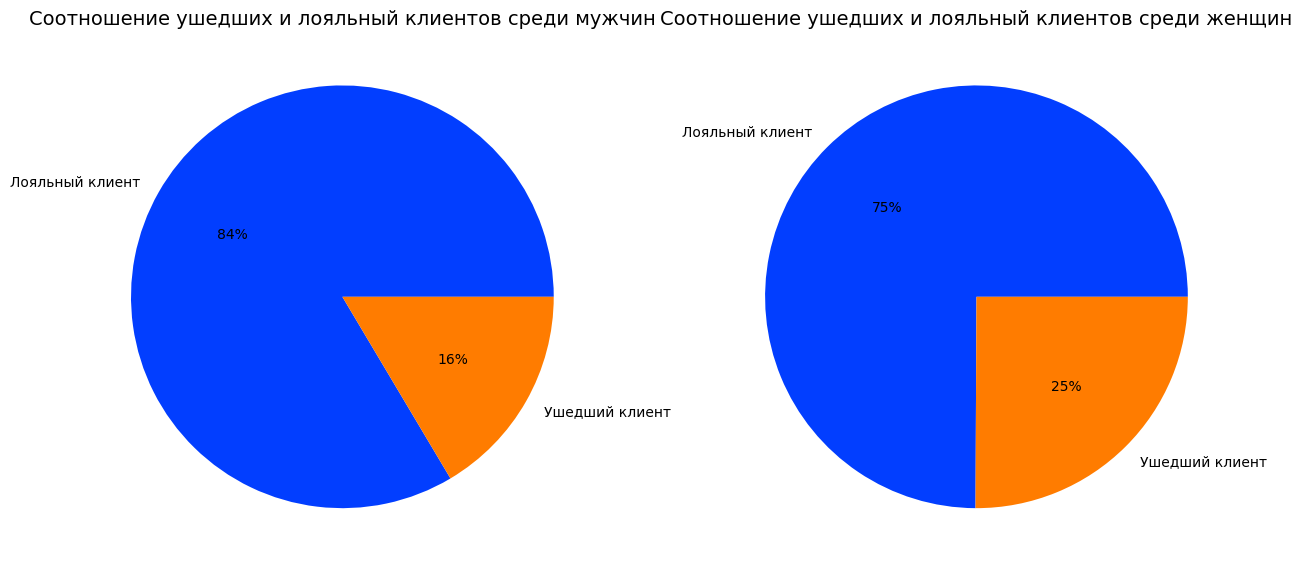

In [281]:
male = churn_df['Gender'] == "Male" # Выделяем мужчин
female = churn_df['Gender'] == 'Female' # Выделяем женщин
male_df = churn_df[male]['Exited'].value_counts() # Выявляем кол-во мужчин в разрезе оттока
female_df = churn_df[female]['Exited'].value_counts() # Выявляем кол-во женщин в разрезе оттока

colors = sns.color_palette('bright')[ 0:5 ]

# Строим круговые диаграммы
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,10))
axes[0].pie(male_df, labels = male_df.index, colors = colors, autopct='%.0f%%')
axes[0].set_title("Соотношение ушедших и лояльный клиентов среди мужчин", fontsize=14)

axes[1].pie(female_df, labels = female_df.index, colors = colors, autopct='%.0f%%')
axes[1].set_title("Соотношение ушедших и лояльный клиентов среди женщин", fontsize=14)
plt.show() 


Исходя из представленных диаграмм, мы видим, что женщины чаще перестают быть клиентами данного банка, однако их процент в соотношении с мужчинами не велик (9 %)

### Задача №7:
Как отток клиентов зависит от числа приобретённых у банка услуг?

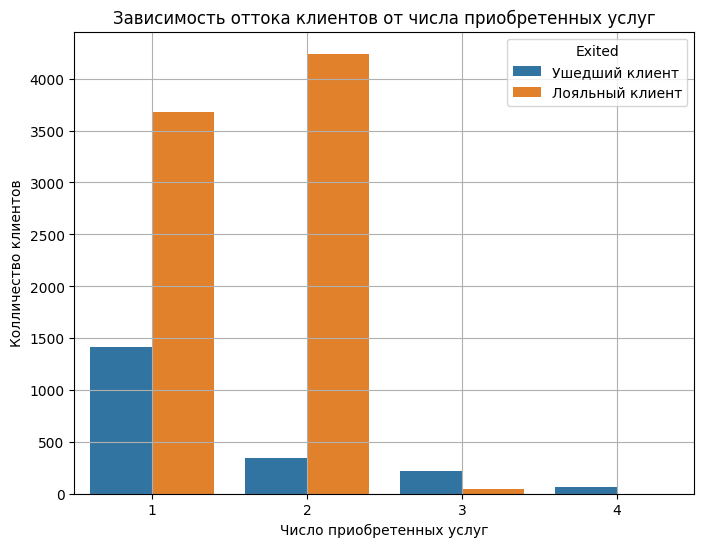

In [282]:
# Строим многоуровневую столбчатую диаграмму
fig = plt.figure(figsize=(8, 6))
countplot = sns.countplot(data=churn_df, x="NumOfProducts", hue="Exited")

countplot.set_title('Зависимость оттока клиентов от числа приобретенных услуг')
countplot.set_xlabel('Число приобретенных услуг')
countplot.set_ylabel('Колличество клиентов')
countplot.grid()


На данном графике мы видим, что большинство лояльных клиентов пользуется двумя приобретенными услугами, а большинество ушедших клиентов пользовались одним. Также, мы видим, что только ушедшие клиенты пользовались четырьмя видами услуг. В виде решения, можно посоветовать создать и презентовать клиентам "гайд" по числу приобретенных услуг. Донести до них мысль о том, что не нужно приобретать много услуг банка, а вместо этого приобрести, пусть и немного, но действительно важных и полезных услуг. (Опять же мы видим, что большинство лояльных клиентов пользуется всего одной или двумя услугами)

### Задача № 8:
Как влияет наличие статуса активного клиента на отток клиентов?

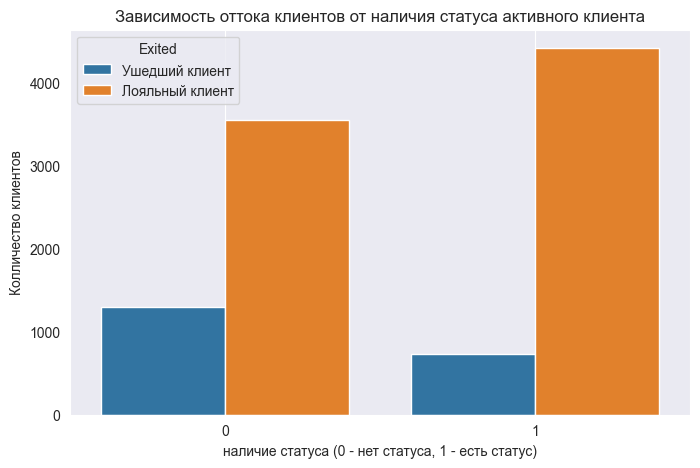

In [283]:
churn_df['IsActiveMember']

# Строим многоуровневую столбчатую диаграмму
fig = plt.figure(figsize=(8, 5))
sns.set_style('darkgrid')
countplot = sns.countplot(data=churn_df, x='IsActiveMember', hue='Exited')

countplot.set_title('Зависимость оттока клиентов от наличия статуса активного клиента')
countplot.set_xlabel('наличие статуса (0 - нет статуса, 1 - есть статус)')
countplot.set_ylabel('Колличество клиентов')
countplot.grid()

В данной диаграмме мы видим, что большее колличество ушедших клиентов не имеют статус активных клиентов. Как решение, нужно обратить внимание на категорию неактивных в числе лояльных клиентов и разработать стратегию возвращения данных клиентов в статус активных

### Задача №9:
В какой стране доля ушедших клиентов больше?

In [284]:
# Создем таблицу, в которой будет указана связь стран клиентов и их статус (лояльный или ушедший)
percent_exited = (pd.DataFrame(dict(round(churn_df[churn_df['Exited'] == 'Ушедший клиент']['Geography'].value_counts()*100/churn_df['Geography'].value_counts(), 2)).items(),columns=['Country', 'LostPercent']))

# Строим диаграмму, связываем её с картой мира и выделяем нужную область для удобства, так как в таблице пристутсвуют только 3 страны
fig = px.choropleth(
    data_frame = percent_exited,
    locations = 'Country',
    locationmode = 'country names',
    range_color=[0, 35],
    color= 'LostPercent',
    color_continuous_scale="bluered", 
    title = 'Доля ушедших клиентов по странам', scope="europe", width = 900, height=600, center={'lat': 47, 'lon': 2})
fig.show()

Исходя их данной диаграммы, больший отток клиентов происходит в Германии. Это может быть связано с изменениями в других банках относительно этой страны. Советуем обратить внимания на нововведения в других банках

### Задача №10:
Узнаем зависимость оттока клиентов от их кредитного рейтинга.

Text(0.5, 1.0, 'Зависимость оттока клиентов от кредитного рейтинга')

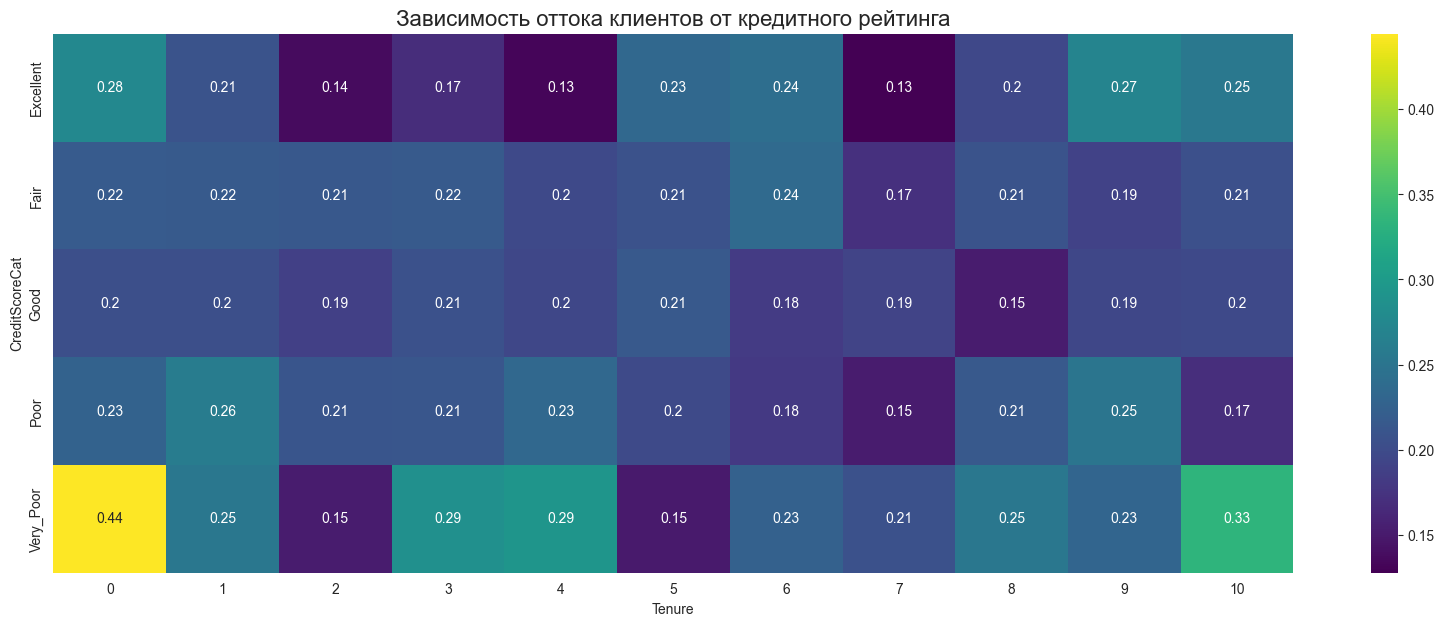

In [285]:
# Создаем функцию для того, чтобы разбить кредитный рейтинг на категории
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

churn_df['CreditScoreCat'] = churn_df['CreditScore'].apply(get_credit_score_cat) # Создаем новый признак, где будет указываться категория кредитного рейтинга
churn_df['ExitedBool'] = churn_df['Exited'].apply(lambda x: 1 if x == "Ушедший клиент" else 0) 

# Создаем сводную таблицу зависимости оттока клиентов от их категории кредитного рейтинга
pivot = churn_df.pivot_table(
    values='ExitedBool',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean'
)

# Создаем тепловую карту
fig = plt.figure(figsize=(20, 7))
heatmap = sns.heatmap(
    data=pivot,
    cmap='viridis',
    annot=True
    )
heatmap.set_title('Зависимость оттока клиентов от кредитного рейтинга', fontsize=16)

Из данной тепловой карты мы видим, что большинство ушедших клиентов имели низкий кредитный рейтинг, а также являлись либо новыми клиентами, либо теми, кто пользуется услугами банка в течении 10 лет. Как решение, можем посоветовать банку обратить внимание на новых клиентов и разработать стратегию касательно этой категории с целью повышения их кредитного рейтинга. А также обратить вниманию на категрию людей, которые пользуются услугами уже 10 лет, но имеют низкий кредитный рейтинг

## Вывод:
Для построении модели прогнозирования ухода клиентов, следует обратить внимание на следующие категории:
* возрастная категория от 40 до 50 лет
* клиенты, которые пользуются больше, чем двумя услугами
* неактивные, в числе лояльных клиентов
* граждане Германии, которые являются клиентами банка
* новые клиенты с низким кредитным рейтингом
* клиенты с низким кредитным рейтингом, которые пользуются услугами банка в течении 10 лет